# Machine Learning Models

In this notebook we test machine learning models in order so see with one best fit our data. For this task we choose the cross_val_score method with the scoring f1.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
from scipy import stats as stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
X_train= pd.read_csv('X_train.csv')
X_test= pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test= pd.read_csv('y_test.csv')

## Logistic Regression

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()

val_acc_LR = cross_val_score(estimator=LR,
                              X= X_train,
                              y=y_train.values.flatten(),
                              cv=10,
                              scoring = 'accuracy')

mean_val_acc_LR = val_acc_LR.mean()
mean_val_acc_LR

0.866764705882353

## Decision Tree Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier

DTC= DecisionTreeClassifier()

val_acc_DTC = cross_val_score(estimator=DTC,
                              X= X_train,
                              y=y_train.values.flatten(),
                              cv=10,
                              scoring = 'accuracy')

mean_val_acc_DTC = val_acc_DTC.mean()
mean_val_acc_DTC

0.9205882352941176

## Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

RFC =RandomForestClassifier()

val_acc_RFC = cross_val_score(estimator=RFC,
                              X= X_train,
                              y=y_train.values.flatten(),
                              cv=10,
                              scoring = 'accuracy')

mean_val_acc_RFC = val_acc_RFC.mean()
mean_val_acc_RFC

0.9376470588235295

## XGBClassifier

In [6]:
import xgboost as xgb

XGB =xgb.XGBClassifier()

val_acc_XGB = cross_val_score(estimator=XGB,
                              X= X_train,
                              y=y_train.values.flatten(),
                              cv=10,
                              scoring = 'accuracy')

mean_val_acc_XGB = val_acc_XGB.mean()
mean_val_acc_XGB

0.9564705882352941

## Comparing The models

Let's see the dispersion by analising the boxplot of the accuracy estimator of all of our models. The boxplot shows that XGBoost model has the best accuracy. So this is the model we will use in our test dataset.

[Text(0, 0, 'Logistic_Regression'),
 Text(1, 0, 'Decision_Tree_Classifier'),
 Text(2, 0, 'Random_Forest_Classifier'),
 Text(3, 0, 'XGBoost')]

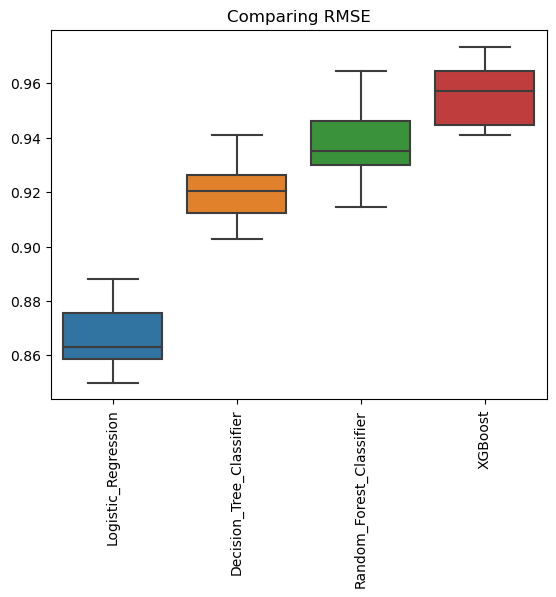

In [7]:
acc = pd.DataFrame({'Logistic_Regression': val_acc_LR, 'Decision_Tree_Classifier': val_acc_DTC, 'Random_Forest_Classifier': val_acc_RFC, 
                     'XGBoost': val_acc_XGB} )
box=sns.boxplot(data=acc)
box.set_title('Comparing RMSE')
box.set_xticklabels(box.get_xticklabels(), rotation=90)

# champion model

We fit all the train data to our XGBoost model

In [8]:
XGB.fit(X_train, y_train)
#LR.coef_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Let's predict our churn for the test dataset

In [9]:
#from sklearn.metrics import f1_score 
churn_predicted = XGB.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print('The accuracy_score is:', accuracy_score(y_test, churn_predicted))

The accuracy_score is: 0.9658823529411765
